In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

LOADING THE DATASET TITANIC

In [20]:
titanic = sns.load_dataset('titanic')

EXPLORING THE DATASET

In [21]:
print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


COUNTING THE NULL VALUES

In [22]:
print(titanic.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


FILLING THE NULL VALUES

In [23]:
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)
titanic['deck'].fillna(titanic['deck'].mode()[0], inplace=True)
titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)

In [24]:
print(titanic.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


CHANGING CATEGORICAL TO NUMERICAL

In [7]:
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

SELECT FEATURES AND TARGET VARIABLE

In [25]:
X = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
y = titanic['survived']

SPLITTING THE DATA INTO TRAINING AND TESTING SETS

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train

,pclass,sex,age,sibsp,parch,fare,embarked
331,1,0,45.5,0,0,28.5000,0
733,2,0,23.0,0,0,13.0000,0
382,3,0,32.0,0,0,7.9250,0
704,3,0,26.0,1,0,7.8542,0
813,3,1,6.0,4,2,31.2750,0
...,...,...,...,...,...,...,...
106,3,1,21.0,0,0,7.6500,0
270,1,0,28.0,0,0,31.0000,0
860,3,0,41.0,2,0,14.1083,0
435,1,1,14.0,1,2,120.0000,0


In [11]:
X_test

,pclass,sex,age,sibsp,parch,fare,embarked
709,3,0,28.0,1,1,15.2458,1
439,2,0,31.0,0,0,10.5000,0
840,3,0,20.0,0,0,7.9250,0
720,2,1,6.0,0,1,33.0000,0
39,3,1,14.0,1,0,11.2417,1
...,...,...,...,...,...,...,...
433,3,0,17.0,0,0,7.1250,0
773,3,0,28.0,0,0,7.2250,1
25,3,1,38.0,1,5,31.3875,0
84,2,1,17.0,0,0,10.5000,0


In [12]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: survived, Length: 712, dtype: int64

In [13]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: survived, Length: 179, dtype: int64

BUILDING THE LOGISTIC REGRESSION MODEL

In [14]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

MAKING THE PREDICTIONS ON TESTING SET

In [ ]:
predictions = model.predict(X_test)

EVALUATING THE MODEL

In [18]:
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

In [ ]:
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

PRINTING THE CONFUSION MATRIX AS HEATMAP

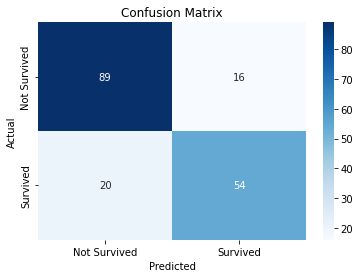

In [17]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()